In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\project\\pronostico_dataset.csv",sep=";")

In [3]:
data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


#### Observing Dataset

In [4]:
data.shape

(6000, 6)

In [5]:
data.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [6]:
data['prognosis'].unique()

array(['retinopathy', 'no_retinopathy'], dtype=object)

In [7]:
data.drop(columns='ID',axis=1,inplace =True)

In [8]:
data.columns

Index(['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

#### Find any missing or duplicate values

In [9]:
data.isnull().sum()

age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [10]:
data[data.duplicated()]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis


#### Categorizing the data

In [11]:
data.dtypes

age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

In [12]:
data.describe()

,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255
std,8.564392,10.669267,9.648200,10.433915
min,35.164761,69.675429,62.807105,69.967453
25%,54.371941,93.267420,83.641788,93.202373
50%,59.831159,100.119926,89.912429,100.060637
75%,65.809652,107.439501,96.682405,107.250829
max,103.279497,151.699660,133.456382,148.233544


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           6000 non-null   float64
 1   systolic_bp   6000 non-null   float64
 2   diastolic_bp  6000 non-null   float64
 3   cholesterol   6000 non-null   float64
 4   prognosis     6000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 234.5+ KB


In [14]:
data.nunique()

age             6000
systolic_bp     6000
diastolic_bp    6000
cholesterol     6000
prognosis          2
dtype: int64

In [15]:
data.prognosis.value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

#### Shape of the dataset

Text(0.5, 1.0, 'cholesterol')

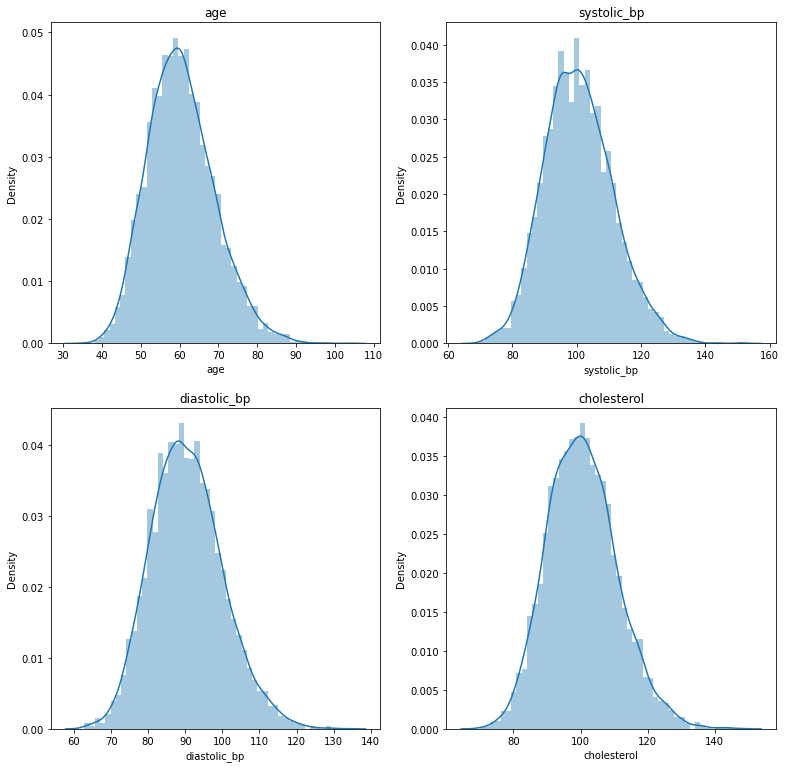

In [20]:
fig,axs=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(13)
sns.distplot(data.age,ax=axs[0,0])
axs[0,0].set_title('age')
sns.distplot(data.systolic_bp,ax=axs[0,1])
axs[0,1].set_title('systolic_bp')
sns.distplot(data.diastolic_bp,ax=axs[1,0])
axs[1,0].set_title('diastolic_bp')
sns.distplot(data.cholesterol,ax=axs[1,1])
axs[1,1].set_title('cholesterol')

In [21]:
data.skew()

age             0.441141
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
dtype: float64

In [22]:
data.kurtosis()

age             0.275005
systolic_bp     0.212703
diastolic_bp    0.162188
cholesterol     0.259594
dtype: float64

Text(0.5, 1.0, 'cholesterol')

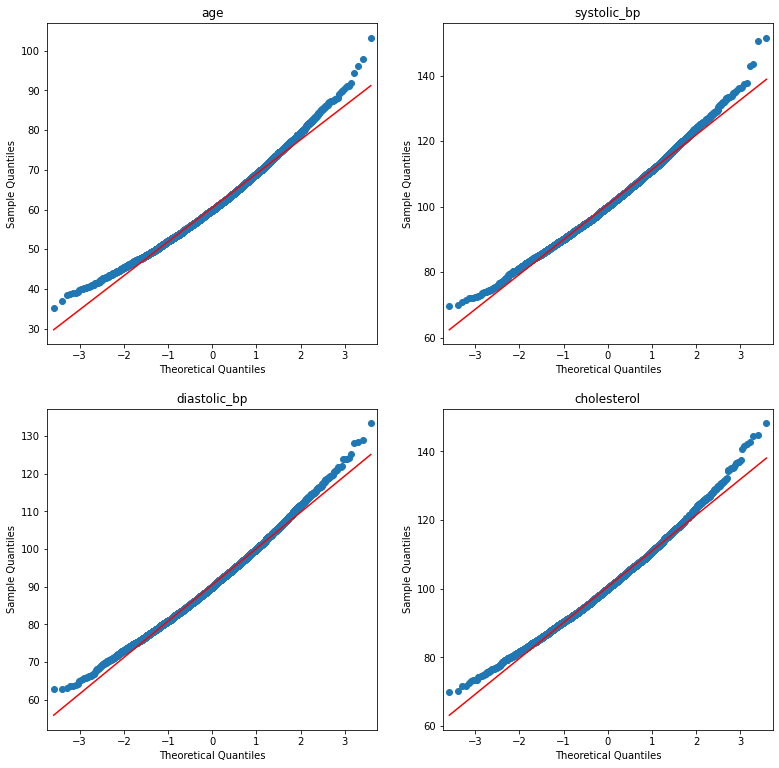

In [23]:
import statsmodels.api as sm
fig,axs=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(13)
sm.qqplot(data.age,line='s',ax=axs[0,0])
axs[0,0].set_title('age')
sm.qqplot(data.systolic_bp,line='s',ax=axs[0,1])
axs[0,1].set_title('systolic_bp')
sm.qqplot(data.diastolic_bp,line='s',ax=axs[1,0])
axs[1,0].set_title('diastolic_bp')
sm.qqplot(data.cholesterol,line='s',ax=axs[1,1])
axs[1,1].set_title('cholesterol')


In [24]:
correlation=data.corr()
correlation

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010361,-0.005410,-0.006972
systolic_bp,0.010361,1.000000,0.405406,0.406029
diastolic_bp,-0.005410,0.405406,1.000000,0.398345
cholesterol,-0.006972,0.406029,0.398345,1.000000


<AxesSubplot:>

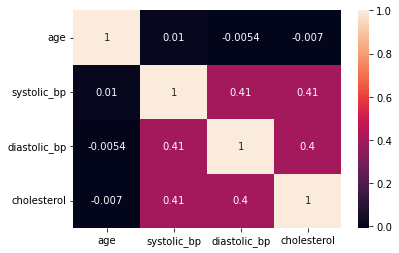

In [25]:
sns.heatmap(correlation,annot=True)

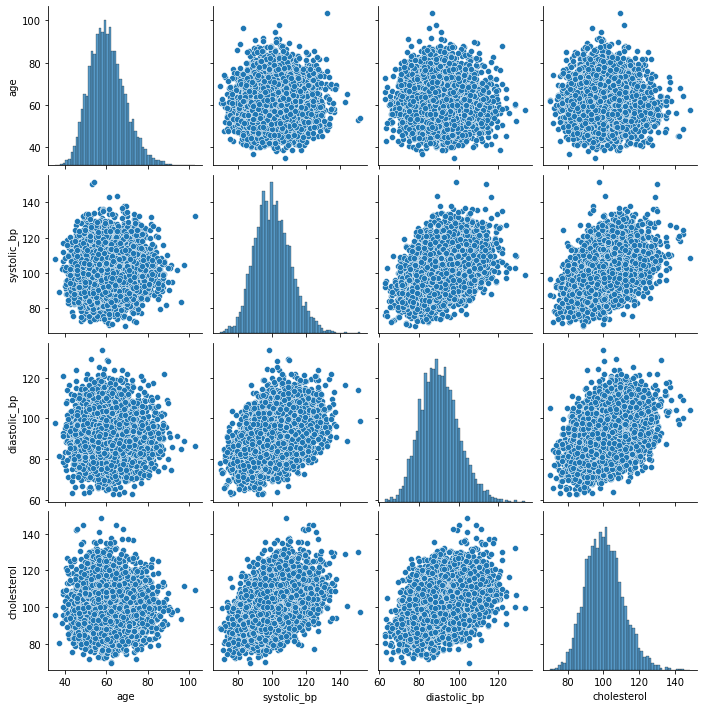

In [26]:
sns.pairplot(data)

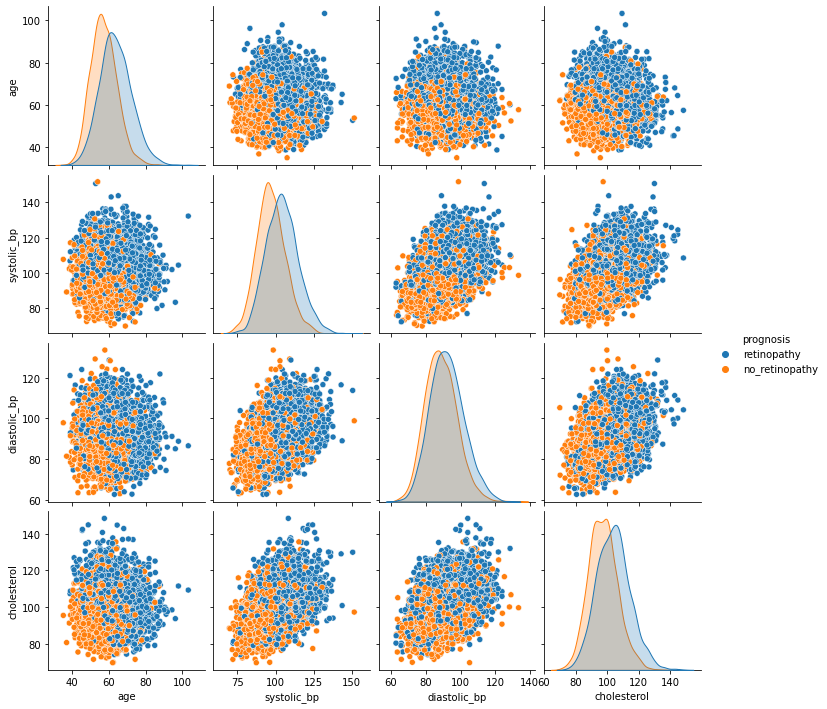

In [27]:
sns.pairplot(data,hue='prognosis')

Text(0.5, 1.0, 'cholesterol')

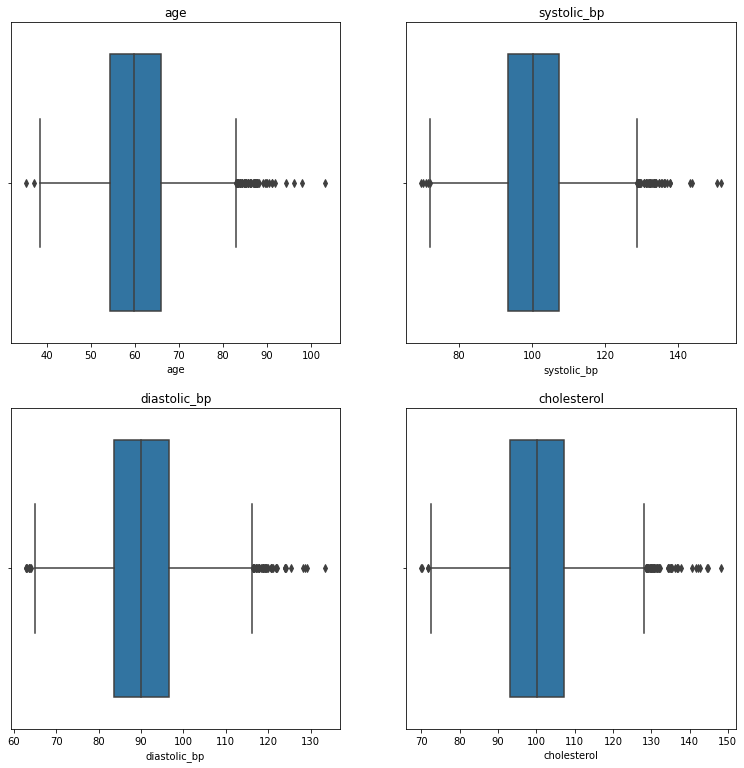

In [28]:
fig,axs=plt.subplots(2,2)
fig.set_figheight(13)
fig.set_figwidth(13)
sns.boxplot(data.age,ax=axs[0,0])
axs[0,0].set_title('age')
sns.boxplot(data.systolic_bp,ax=axs[0,1])
axs[0,1].set_title('systolic_bp')
sns.boxplot(data.diastolic_bp,ax=axs[1,0])
axs[1,0].set_title('diastolic_bp')
sns.boxplot(data.cholesterol,ax=axs[1,1])
axs[1,1].set_title('cholesterol')

In [29]:
age_out=data[(((data.age-data.age.mean())/data.age.std())>3) | (((data.age-data.age.mean())/data.age.std())<-3)]
sys_out=data[(((data.systolic_bp-data.systolic_bp.mean())/data.systolic_bp.std())>3) | (((data.systolic_bp-data.systolic_bp.mean())/data.systolic_bp.std())<-3)]
dia_out=data[(((data.diastolic_bp-data.diastolic_bp.mean())/data.diastolic_bp.std())>3) | (((data.diastolic_bp-data.diastolic_bp.mean())/data.diastolic_bp.std())<-3)]
col_out=data[(((data.cholesterol-data.cholesterol.mean())/data.cholesterol.std())>3) | (((data.cholesterol-data.cholesterol.mean())/data.cholesterol.std())<-3)]

In [30]:
out=pd.concat([age_out,sys_out,dia_out,col_out])
out.drop_duplicates(inplace=True)
out

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
494,88.192280,105.019242,96.770507,102.213642,retinopathy
898,86.919000,98.832910,91.423936,111.608300,retinopathy
943,88.991259,81.420801,95.767988,104.277551,retinopathy
1054,94.381111,101.794209,91.183143,98.603710,retinopathy
1351,87.523454,91.807235,84.977094,98.335758,retinopathy
...,...,...,...,...,...
4886,67.461640,109.394057,117.753062,136.812161,retinopathy
5155,45.591349,120.950071,97.291452,142.280689,retinopathy
5336,48.759074,124.335522,108.984458,144.712660,retinopathy
5429,61.932287,105.754866,117.400561,134.705126,retinopathy


In [31]:
print('age outliers:{}'.format(len(age_out)),'systolic_bp outliers:{}'.format(len(sys_out)),'diastolic_bp outliers:{}'.format(len(dia_out)),'cholesterol outliers:{}'.format(len(col_out)),sep='\n')

age outliers:30
systolic_bp outliers:22
diastolic_bp outliers:21
cholesterol outliers:22


In [32]:
age_out_iqr=data[(data.age>(data.age.quantile(0.75)+1.5*(data.age.quantile(0.75)-data.age.quantile(0.25)))) | (data.age<(data.age.quantile(0.25)-1.5*(data.age.quantile(0.75)-data.age.quantile(0.25))))]
sys_out_iqr=data[(data.systolic_bp>(data.systolic_bp.quantile(0.75)+1.5*(data.systolic_bp.quantile(0.75)-data.systolic_bp.quantile(0.25)))) | (data.systolic_bp<(data.systolic_bp.quantile(0.25)-1.5*(data.systolic_bp.quantile(0.75)-data.systolic_bp.quantile(0.25))))]
dia_out_iqr=data[(data.diastolic_bp>(data.diastolic_bp.quantile(0.75)+1.5*(data.diastolic_bp.quantile(0.75)-data.diastolic_bp.quantile(0.25)))) | (data.diastolic_bp<(data.diastolic_bp.quantile(0.25)-1.5*(data.diastolic_bp.quantile(0.75)-data.diastolic_bp.quantile(0.25))))]
col_out_iqr=data[(data.cholesterol>(data.cholesterol.quantile(0.75)+1.5*(data.cholesterol.quantile(0.75)-data.cholesterol.quantile(0.25)))) | (data.cholesterol<(data.cholesterol.quantile(0.25)-1.5*(data.cholesterol.quantile(0.75)-data.cholesterol.quantile(0.25))))]

In [33]:
out_iqr=pd.concat([age_out_iqr,sys_out_iqr,dia_out_iqr,col_out_iqr])
out_iqr.drop_duplicates(inplace=True)
out_iqr

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
24,82.979636,100.211368,86.173067,97.026684,retinopathy
144,84.334735,120.766914,94.047859,107.825557,retinopathy
292,83.385591,99.193072,91.498595,94.259227,retinopathy
465,84.688583,100.999339,88.130268,99.921832,retinopathy
494,88.192280,105.019242,96.770507,102.213642,retinopathy
...,...,...,...,...,...
5164,50.548316,119.220357,100.476010,128.622094,retinopathy
5336,48.759074,124.335522,108.984458,144.712660,retinopathy
5477,64.122062,98.635651,107.255219,131.677153,no_retinopathy
5748,56.774707,110.354672,102.929523,136.074457,retinopathy


In [49]:
print('age outliers:{}'.format(len(age_out_iqr)),'systolic_bp outliers:{}'.format(len(sys_out_iqr)),'diastolic_bp outliers:{}'.format(len(dia_out_iqr)),'cholesterol outliers:{}'.format(len(col_out_iqr)),sep='\n')

age outliers:65
systolic_bp outliers:55
diastolic_bp outliers:55
cholesterol outliers:54


In [16]:
data.loc[data.prognosis=='retinopathy','prognosis']=1
data.loc[data.prognosis=='no_retinopathy','prognosis']=0

In [17]:
df=data.copy()
x=df.iloc[:,:-1]

ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=df.iloc[:,-1]
y=y.astype(int)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)
accuracy={}
recall={}
precision={}
f1={}
models={}

0.7608333333333334
0.7805280528052805
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       594
           1       0.75      0.78      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

confusion matrix:

 [[440 154]
 [133 473]]


Text(0, 0.5, 'True Positive Rate')

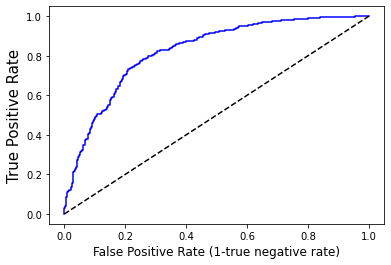

In [18]:
kfold=KFold(n_splits=10)
model=LogisticRegression()
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,lr.predict(x_test)))
print(metrics.recall_score(y_test,lr.predict(x_test)))
print(metrics.classification_report(y_test,lr.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,lr.predict(x_test)))
accuracy['lr']=metrics.accuracy_score(y_test,lr.predict(x_test))
recall['lr']=metrics.recall_score(y_test,lr.predict(x_test))
f1['lr']=metrics.f1_score(y_test,lr.predict(x_test))
precision['lr']=metrics.precision_score(y_test,lr.predict(x_test))
models['lr']=lr
auc=metrics.roc_auc_score(y_test,lr.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [49]:
param_grid = [{'max_depth':[1,2,3,4,5]}]
dt=DecisionTreeClassifier(criterion='gini')
gsdt = GridSearchCV(dt,param_grid,scoring='recall',cv=kfold)
gsdt.fit(x_train,y_train)
gsdt.best_params_ , gsdt.best_score_

({'max_depth': 2}, 0.7874816729310963)

0.7175
0.7937293729372937
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       594
           1       0.69      0.79      0.74       606

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200

confusion matrix:

 [[380 214]
 [125 481]]


Text(0, 0.5, 'True Positive Rate')

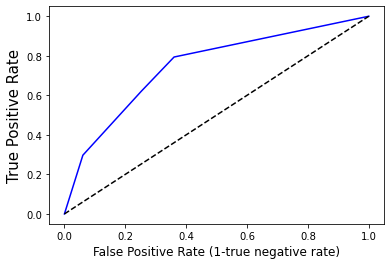

In [55]:
models['Decision Tree']=DecisionTreeClassifier(max_depth=2,criterion='gini')
dt=DecisionTreeClassifier(max_depth=2,criterion='gini')
dt.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,dt.predict(x_test)))
print(metrics.recall_score(y_test,dt.predict(x_test)))
print(metrics.classification_report(y_test,dt.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,dt.predict(x_test)))
accuracy['dt']=metrics.accuracy_score(y_test,dt.predict(x_test))
recall['dt']=metrics.recall_score(y_test,dt.predict(x_test))
precision['dt']=metrics.precision_score(y_test,dt.predict(x_test))
f1['dt']=metrics.f1_score(y_test,dt.predict(x_test))
models['dt']=dt
auc=metrics.roc_auc_score(y_test,dt.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,dt.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [56]:
k_range=range(1,100)
param_grid = [{'weights':['uniform','distance'],'n_neighbors':list(k_range)}]
knn=KNeighborsClassifier()
gsknn = GridSearchCV(knn,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gsknn.fit(x_train,y_train)
gsknn.best_params_ , gsknn.best_score_

({'n_neighbors': 34, 'weights': 'distance'}, 0.768337860286967)

0.7483333333333333
0.7937293729372937
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       594
           1       0.73      0.79      0.76       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[417 177]
 [125 481]]


Text(0, 0.5, 'True Positive Rate')

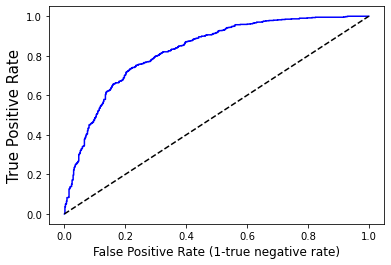

In [57]:
knn=KNeighborsClassifier(n_neighbors=34,weights='distance')
knn.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,knn.predict(x_test)))
print(metrics.recall_score(y_test,knn.predict(x_test)))
print(metrics.classification_report(y_test,knn.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,knn.predict(x_test)))
accuracy['knn']=metrics.accuracy_score(y_test,knn.predict(x_test))
recall['knn']=metrics.recall_score(y_test,knn.predict(x_test))
precision['knn']=metrics.precision_score(y_test,knn.predict(x_test))
f1['knn']=metrics.f1_score(y_test,knn.predict(x_test))
models['knn']=knn
auc=metrics.roc_auc_score(y_test,knn.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,knn.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

0.7533333333333333
0.7442244224422442
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       594
           1       0.76      0.74      0.75       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[453 141]
 [155 451]]


Text(0, 0.5, 'True Positive Rate')

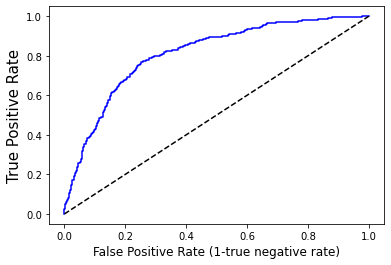

In [58]:
nb=GaussianNB()
nb.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,nb.predict(x_test)))
print(metrics.recall_score(y_test,nb.predict(x_test)))
print(metrics.classification_report(y_test,nb.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,nb.predict(x_test)))
accuracy['nb']=metrics.accuracy_score(y_test,nb.predict(x_test))
recall['nb']=metrics.recall_score(y_test,nb.predict(x_test))
precision['nb']=metrics.precision_score(y_test,nb.predict(x_test))
f1['nb']=metrics.f1_score(y_test,nb.predict(x_test))
models['nb']=nb
auc=metrics.roc_auc_score(y_test,nb.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,nb.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [59]:
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(svm,param_grid,scoring='f1',n_jobs=-1,cv=kfold)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 11, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7613616025309737)

0.745
0.8102310231023102
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       594
           1       0.72      0.81      0.76       606

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

confusion matrix:

 [[403 191]
 [115 491]]


Text(0, 0.5, 'True Positive Rate')

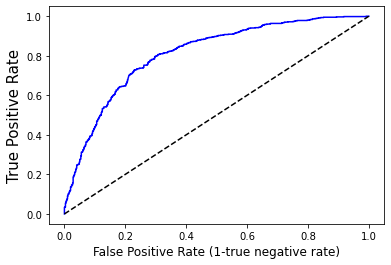

In [61]:
model_SVM=SVC(kernel='rbf',gamma=0.01,C=0.01,probability=True)
model_SVM.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_SVM.predict(x_test)))
print(metrics.recall_score(y_test,model_SVM.predict(x_test)))
print(metrics.classification_report(y_test,model_SVM.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_SVM.predict(x_test)))
accuracy['SVM']=metrics.accuracy_score(y_test,model_SVM.predict(x_test))
recall['SVM']=metrics.recall_score(y_test,model_SVM.predict(x_test))
precision['SVM']=metrics.precision_score(y_test,model_SVM.predict(x_test))
f1['SVM']=metrics.f1_score(y_test,model_SVM.predict(x_test))
models['SVM']=model_SVM
auc=metrics.roc_auc_score(y_test,model_SVM.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,model_SVM.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)


In [63]:
param_grid=[{'n_estimators':[200,400,600,800,1000]}]
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini'),random_state=7)
gsada=GridSearchCV(ada,param_grid,n_jobs=-1,scoring='recall',cv=kfold)
gsada.fit(x_train,y_train)
gsada.best_params_ , gsada.best_score_


({'n_estimators': 400}, 0.7304981433703521)

0.7433333333333333
0.7623762376237624
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       594
           1       0.74      0.76      0.75       606

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200

[[430 164]
 [144 462]]


Text(0, 0.5, 'True Positive Rate')

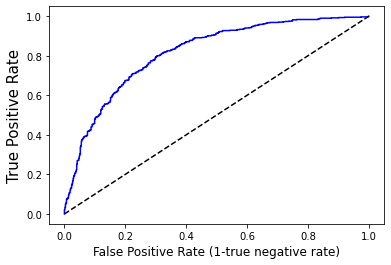

In [64]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini'),random_state=7,n_estimators=400)
ada.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,ada.predict(x_test)))
print(metrics.recall_score(y_test,ada.predict(x_test)))
print(metrics.classification_report(y_test,ada.predict(x_test)))
print(metrics.confusion_matrix(y_test,ada.predict(x_test)))
accuracy['ada']=metrics.accuracy_score(y_test,ada.predict(x_test))
recall['ada']=metrics.recall_score(y_test,ada.predict(x_test))
precision['ada']=metrics.precision_score(y_test,ada.predict(x_test))
f1['ada']=metrics.f1_score(y_test,ada.predict(x_test))
models['ada']=ada
auc=metrics.roc_auc_score(y_test,ada.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,ada.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [65]:
param_grid=[{'n_estimators':range(1,101),'max_samples':[0.2,0.4,0.6,0.8,1.0]}]
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,criterion='entropy'),random_state=7)
gsb = GridSearchCV(bagging,param_grid,scoring='f1',n_jobs=-1,cv=kfold)
gsb.fit(x_train,y_train)
gsb.best_params_ , gsb.best_score_

({'max_samples': 0.2, 'n_estimators': 17}, 0.7475700503216283)

0.7516666666666667
0.7722772277227723
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       594
           1       0.75      0.77      0.76       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200

confusion matrix:

 [[434 160]
 [138 468]]


Text(0, 0.5, 'True Positive Rate')

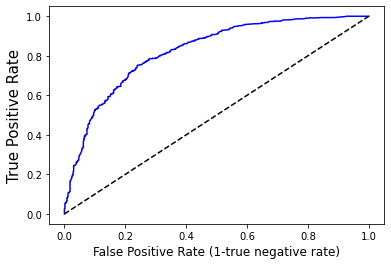

In [66]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,criterion='entropy'),n_estimators=17,max_samples=0.2,random_state=7)
bagging.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,bagging.predict(x_test)))
print(metrics.recall_score(y_test,bagging.predict(x_test)))
print(metrics.classification_report(y_test,bagging.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,bagging.predict(x_test)))
accuracy['bagging']=metrics.accuracy_score(y_test,bagging.predict(x_test))
recall['bagging']=metrics.recall_score(y_test,bagging.predict(x_test))
precision['bagging']=metrics.precision_score(y_test,bagging.predict(x_test))
f1['bagging']=metrics.f1_score(y_test,bagging.predict(x_test))
models['bagging']=bagging
auc=metrics.roc_auc_score(y_test,bagging.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,bagging.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [19]:
param_grid=[{'n_estimators':range(64,125),'max_depth':[2,3,4,5]}]
rf = RandomForestClassifier(max_features=4,max_depth=3,criterion='gini',random_state=23)
gsrf = GridSearchCV(rf,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gsrf.fit(x_train,y_train)
gsrf.best_params_ , gsrf.best_score_

KeyboardInterrupt: 

0.7408333333333333
0.8267326732673267
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       594
           1       0.71      0.83      0.76       606

    accuracy                           0.74      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.74      0.74      1200

confusion matrix:

 [[388 206]
 [105 501]]


Text(0, 0.5, 'True Positive Rate')

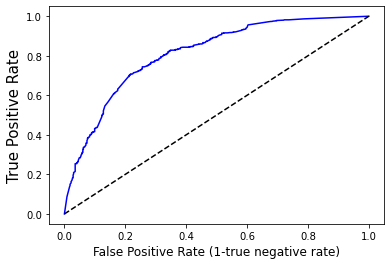

In [20]:
model_rf = RandomForestClassifier(n_estimators=107,max_depth=2, max_features=4,criterion='gini',random_state=23)
model_rf.fit(x_train,y_train)
print(metrics.accuracy_score(y_test,model_rf.predict(x_test)))
print(metrics.recall_score(y_test,model_rf.predict(x_test)))
print(metrics.classification_report(y_test,model_rf.predict(x_test)))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,model_rf.predict(x_test)))
accuracy['rf']=metrics.accuracy_score(y_test,model_rf.predict(x_test))
recall['rf']=metrics.recall_score(y_test,model_rf.predict(x_test))
precision['rf']=metrics.precision_score(y_test,model_rf.predict(x_test))
f1['rf']=metrics.f1_score(y_test,model_rf.predict(x_test))
models['rf']=model_rf
auc=metrics.roc_auc_score(y_test,model_rf.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,model_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [69]:
param_grid=[{'max_depth':[2,3,4,5]}]
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,random_state=42)
gslgb = GridSearchCV(model_lgb,param_grid,scoring='recall',n_jobs=-1,cv=kfold)
gslgb.fit(x_train,y_train)
gslgb.best_params_ , gslgb.best_score_

({'max_depth': 4}, 0.7722174355073113)

0.7566666666666667
0.806930693069307
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       594
           1       0.74      0.81      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200

confusion matrix:

 [[419 175]
 [117 489]]


Text(0, 0.5, 'True Positive Rate')

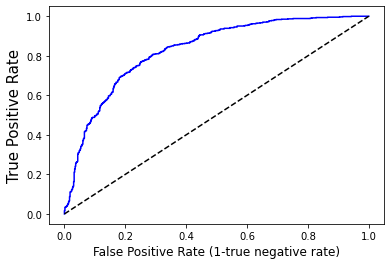

In [70]:
lgbm=lgb.LGBMClassifier(learning_rate=0.09,random_state=42,max_depth=4)
lgbm.fit(x_train,y_train,eval_metric='recall')
y_pred=lgbm.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,y_pred))
accuracy['lgbm']=metrics.accuracy_score(y_test,y_pred)
recall['lgbm']=metrics.recall_score(y_test,y_pred)
precision['lgbm']=metrics.precision_score(y_test,y_pred)
f1['lgbm']=metrics.f1_score(y_test,y_pred)
models['lgbm']=lgbm
auc=metrics.roc_auc_score(y_test,lgbm.predict(x_test))
fpr,tpr,threshold=metrics.roc_curve(y_test,lgbm.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [71]:
recal={}

for i in range(1,5):
    for j in range(1,i+1):
        model_nn=Sequential()
        model_nn.add(Dense(4,  activation='relu'))
        model_nn.add(Dense(i,  activation='relu'))
        model_nn.add(Dense(j,  activation='relu'))
        model_nn.add(Dense(1, activation='sigmoid'))
        model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_nn.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=50)
        y_pred_nn=np.round(model_nn.predict(x_test))
        recal[metrics.recall_score(y_test,y_pred_nn)]=(i,j,metrics.accuracy_score(y_test,y_pred_nn))
        

Epoch 1/250
65/65 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6930 - val_accuracy: 0.5180
Epoch 2/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5163 - val_loss: 0.6928 - val_accuracy: 0.5180
Epoch 3/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5163 - val_loss: 0.6927 - val_accuracy: 0.5180
Epoch 4/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5163 - val_loss: 0.6927 - val_accuracy: 0.5180
Epoch 5/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 6/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 7/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6926 - val_accuracy: 0.5180
Epoch 8/250
6

Epoch 59/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 60/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 61/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 62/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 63/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 64/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 65/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 174/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 175/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 176/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 177/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 178/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 179/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 180/250

65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 38/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 39/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 40/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 41/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 42/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 43/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 44/250
65/65 

Epoch 95/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 96/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 97/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 98/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 99/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 100/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 101/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoc

65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 210/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 211/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 212/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 213/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 214/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 215/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5163 - val_loss: 0.6925 - val_accuracy: 0.5180
Epoch 216/250

Epoch 74/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7552 - val_loss: 0.5157 - val_accuracy: 0.7401
Epoch 75/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7549 - val_loss: 0.5157 - val_accuracy: 0.7420
Epoch 76/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7546 - val_loss: 0.5155 - val_accuracy: 0.7426
Epoch 77/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7552 - val_loss: 0.5152 - val_accuracy: 0.7420
Epoch 78/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7552 - val_loss: 0.5154 - val_accuracy: 0.7413
Epoch 79/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7561 - val_loss: 0.5155 - val_accuracy: 0.7413
Epoch 80/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7558 - val_loss: 0.5151 - val_accuracy: 0.7420
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7561 - val_loss: 0.5145 - val_accuracy: 0.7356
Epoch 189/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7568 - val_loss: 0.5143 - val_accuracy: 0.7375
Epoch 190/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7543 - val_loss: 0.5143 - val_accuracy: 0.7350
Epoch 191/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7552 - val_loss: 0.5145 - val_accuracy: 0.7369
Epoch 192/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7558 - val_loss: 0.5143 - val_accuracy: 0.7363
Epoch 193/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7561 - val_loss: 0.5145 - val_accuracy: 0.7382
Epoch 194/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7555 - val_loss: 0.5147 - val_accuracy: 0.7344
Epoch 195/250

65/65 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7499 - val_loss: 0.5226 - val_accuracy: 0.7363
Epoch 53/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7490 - val_loss: 0.5220 - val_accuracy: 0.7363
Epoch 54/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7499 - val_loss: 0.5218 - val_accuracy: 0.7356
Epoch 55/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7493 - val_loss: 0.5214 - val_accuracy: 0.7338
Epoch 56/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7493 - val_loss: 0.5213 - val_accuracy: 0.7350
Epoch 57/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7487 - val_loss: 0.5210 - val_accuracy: 0.7344
Epoch 58/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7481 - val_loss: 0.5210 - val_accuracy: 0.7369
Epoch 59/250
65/65 

Epoch 110/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7515 - val_loss: 0.5149 - val_accuracy: 0.7350
Epoch 111/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7524 - val_loss: 0.5146 - val_accuracy: 0.7331
Epoch 112/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7527 - val_loss: 0.5149 - val_accuracy: 0.7344
Epoch 113/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7502 - val_loss: 0.5144 - val_accuracy: 0.7325
Epoch 114/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7527 - val_loss: 0.5146 - val_accuracy: 0.7331
Epoch 115/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7509 - val_loss: 0.5144 - val_accuracy: 0.7325
Epoch 116/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7509 - val_loss: 0.5146 - val_accuracy: 0.7344

65/65 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7515 - val_loss: 0.5157 - val_accuracy: 0.7350
Epoch 225/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7533 - val_loss: 0.5156 - val_accuracy: 0.7363
Epoch 226/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7527 - val_loss: 0.5148 - val_accuracy: 0.7356
Epoch 227/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7521 - val_loss: 0.5144 - val_accuracy: 0.7350
Epoch 228/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7502 - val_loss: 0.5150 - val_accuracy: 0.7338
Epoch 229/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7530 - val_loss: 0.5150 - val_accuracy: 0.7363
Epoch 230/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7512 - val_loss: 0.5149 - val_accuracy: 0.7356
Epoch 231/250

Epoch 89/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7509 - val_loss: 0.5113 - val_accuracy: 0.7426
Epoch 90/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7521 - val_loss: 0.5113 - val_accuracy: 0.7420
Epoch 91/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7537 - val_loss: 0.5110 - val_accuracy: 0.7407
Epoch 92/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7509 - val_loss: 0.5108 - val_accuracy: 0.7407
Epoch 93/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7521 - val_loss: 0.5107 - val_accuracy: 0.7426
Epoch 94/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7518 - val_loss: 0.5106 - val_accuracy: 0.7413
Epoch 95/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7515 - val_loss: 0.5105 - val_accuracy: 0.7413
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7487 - val_loss: 0.5072 - val_accuracy: 0.7470
Epoch 204/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7477 - val_loss: 0.5071 - val_accuracy: 0.7445
Epoch 205/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7477 - val_loss: 0.5074 - val_accuracy: 0.7426
Epoch 206/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7481 - val_loss: 0.5071 - val_accuracy: 0.7457
Epoch 207/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7490 - val_loss: 0.5074 - val_accuracy: 0.7457
Epoch 208/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7496 - val_loss: 0.5071 - val_accuracy: 0.7451
Epoch 209/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7490 - val_loss: 0.5074 - val_accuracy: 0.7464
Epoch 210/250

Epoch 68/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7509 - val_loss: 0.5189 - val_accuracy: 0.7325
Epoch 69/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7502 - val_loss: 0.5188 - val_accuracy: 0.7293
Epoch 70/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7512 - val_loss: 0.5188 - val_accuracy: 0.7287
Epoch 71/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7521 - val_loss: 0.5186 - val_accuracy: 0.7274
Epoch 72/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7524 - val_loss: 0.5186 - val_accuracy: 0.7274
Epoch 73/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7515 - val_loss: 0.5187 - val_accuracy: 0.7274
Epoch 74/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7512 - val_loss: 0.5183 - val_accuracy: 0.7293
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7505 - val_loss: 0.5143 - val_accuracy: 0.7363
Epoch 183/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7543 - val_loss: 0.5145 - val_accuracy: 0.7356
Epoch 184/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7546 - val_loss: 0.5142 - val_accuracy: 0.7356
Epoch 185/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7533 - val_loss: 0.5140 - val_accuracy: 0.7350
Epoch 186/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7546 - val_loss: 0.5143 - val_accuracy: 0.7356
Epoch 187/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7537 - val_loss: 0.5141 - val_accuracy: 0.7325
Epoch 188/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7530 - val_loss: 0.5144 - val_accuracy: 0.7344
Epoch 189/250

65/65 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7446 - val_loss: 0.5259 - val_accuracy: 0.7363
Epoch 47/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7471 - val_loss: 0.5254 - val_accuracy: 0.7375
Epoch 48/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7453 - val_loss: 0.5248 - val_accuracy: 0.7356
Epoch 49/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7471 - val_loss: 0.5241 - val_accuracy: 0.7344
Epoch 50/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7462 - val_loss: 0.5237 - val_accuracy: 0.7375
Epoch 51/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7468 - val_loss: 0.5230 - val_accuracy: 0.7338
Epoch 52/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7477 - val_loss: 0.5227 - val_accuracy: 0.7363
Epoch 53/250
65/65 

Epoch 104/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7509 - val_loss: 0.5126 - val_accuracy: 0.7369
Epoch 105/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7524 - val_loss: 0.5125 - val_accuracy: 0.7369
Epoch 106/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7512 - val_loss: 0.5127 - val_accuracy: 0.7325
Epoch 107/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7537 - val_loss: 0.5127 - val_accuracy: 0.7325
Epoch 108/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7540 - val_loss: 0.5125 - val_accuracy: 0.7356
Epoch 109/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7524 - val_loss: 0.5122 - val_accuracy: 0.7350
Epoch 110/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7512 - val_loss: 0.5122 - val_accuracy: 0.7369

65/65 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7521 - val_loss: 0.5105 - val_accuracy: 0.7369
Epoch 219/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7515 - val_loss: 0.5104 - val_accuracy: 0.7350
Epoch 220/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7524 - val_loss: 0.5106 - val_accuracy: 0.7363
Epoch 221/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7512 - val_loss: 0.5104 - val_accuracy: 0.7356
Epoch 222/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7530 - val_loss: 0.5105 - val_accuracy: 0.7344
Epoch 223/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7518 - val_loss: 0.5102 - val_accuracy: 0.7363
Epoch 224/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7509 - val_loss: 0.5106 - val_accuracy: 0.7344
Epoch 225/250

Epoch 83/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7462 - val_loss: 0.5120 - val_accuracy: 0.7432
Epoch 84/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7471 - val_loss: 0.5120 - val_accuracy: 0.7413
Epoch 85/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7474 - val_loss: 0.5125 - val_accuracy: 0.7401
Epoch 86/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7484 - val_loss: 0.5121 - val_accuracy: 0.7407
Epoch 87/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7477 - val_loss: 0.5126 - val_accuracy: 0.7407
Epoch 88/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7484 - val_loss: 0.5124 - val_accuracy: 0.7401
Epoch 89/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7474 - val_loss: 0.5124 - val_accuracy: 0.7394
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7505 - val_loss: 0.5136 - val_accuracy: 0.7344
Epoch 198/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7509 - val_loss: 0.5137 - val_accuracy: 0.7344
Epoch 199/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7505 - val_loss: 0.5135 - val_accuracy: 0.7363
Epoch 200/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7493 - val_loss: 0.5136 - val_accuracy: 0.7356
Epoch 201/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7496 - val_loss: 0.5136 - val_accuracy: 0.7350
Epoch 202/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7509 - val_loss: 0.5137 - val_accuracy: 0.7344
Epoch 203/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7509 - val_loss: 0.5137 - val_accuracy: 0.7356
Epoch 204/250

65/65 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7250 - val_loss: 0.6028 - val_accuracy: 0.7174
Epoch 5/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7381 - val_loss: 0.5781 - val_accuracy: 0.7287
Epoch 6/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7462 - val_loss: 0.5641 - val_accuracy: 0.7274
Epoch 7/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7471 - val_loss: 0.5558 - val_accuracy: 0.7293
Epoch 8/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7493 - val_loss: 0.5524 - val_accuracy: 0.7356
Epoch 9/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7477 - val_loss: 0.5483 - val_accuracy: 0.7344
Epoch 10/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7477 - val_loss: 0.5457 - val_accuracy: 0.7325
Epoch 11/250
65/65 [====

Epoch 62/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7474 - val_loss: 0.5110 - val_accuracy: 0.7426
Epoch 63/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7468 - val_loss: 0.5115 - val_accuracy: 0.7438
Epoch 64/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7468 - val_loss: 0.5118 - val_accuracy: 0.7426
Epoch 65/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7471 - val_loss: 0.5108 - val_accuracy: 0.7426
Epoch 66/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7465 - val_loss: 0.5105 - val_accuracy: 0.7432
Epoch 67/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7487 - val_loss: 0.5113 - val_accuracy: 0.7438
Epoch 68/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7465 - val_loss: 0.5103 - val_accuracy: 0.7438
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7527 - val_loss: 0.5103 - val_accuracy: 0.7356
Epoch 177/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7509 - val_loss: 0.5114 - val_accuracy: 0.7369
Epoch 178/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7502 - val_loss: 0.5116 - val_accuracy: 0.7350
Epoch 179/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7477 - val_loss: 0.5115 - val_accuracy: 0.7375
Epoch 180/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7496 - val_loss: 0.5103 - val_accuracy: 0.7369
Epoch 181/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7502 - val_loss: 0.5105 - val_accuracy: 0.7363
Epoch 182/250
65/65 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7490 - val_loss: 0.5123 - val_accuracy: 0.7356
Epoch 183/250

65/65 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7505 - val_loss: 0.5114 - val_accuracy: 0.7420
Epoch 41/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7468 - val_loss: 0.5111 - val_accuracy: 0.7394
Epoch 42/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7521 - val_loss: 0.5115 - val_accuracy: 0.7407
Epoch 43/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7537 - val_loss: 0.5111 - val_accuracy: 0.7426
Epoch 44/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7515 - val_loss: 0.5111 - val_accuracy: 0.7375
Epoch 45/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7505 - val_loss: 0.5116 - val_accuracy: 0.7394
Epoch 46/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7537 - val_loss: 0.5108 - val_accuracy: 0.7382
Epoch 47/250
65/65 

Epoch 98/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7515 - val_loss: 0.5097 - val_accuracy: 0.7356
Epoch 99/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7512 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 100/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7509 - val_loss: 0.5098 - val_accuracy: 0.7344
Epoch 101/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7527 - val_loss: 0.5091 - val_accuracy: 0.7338
Epoch 102/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7524 - val_loss: 0.5100 - val_accuracy: 0.7338
Epoch 103/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7509 - val_loss: 0.5094 - val_accuracy: 0.7331
Epoch 104/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7518 - val_loss: 0.5091 - val_accuracy: 0.7338
E

65/65 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7521 - val_loss: 0.5124 - val_accuracy: 0.7312
Epoch 213/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7512 - val_loss: 0.5109 - val_accuracy: 0.7338
Epoch 214/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7496 - val_loss: 0.5108 - val_accuracy: 0.7369
Epoch 215/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7512 - val_loss: 0.5117 - val_accuracy: 0.7319
Epoch 216/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7499 - val_loss: 0.5108 - val_accuracy: 0.7319
Epoch 217/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7530 - val_loss: 0.5123 - val_accuracy: 0.7306
Epoch 218/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7512 - val_loss: 0.5108 - val_accuracy: 0.7312
Epoch 219/250

In [72]:
recal

{1.0: (2, 1, 0.505),
 0.7953795379537953: (2, 2, 0.7291666666666666),
 0.806930693069307: (4, 4, 0.7508333333333334),
 0.8052805280528053: (3, 2, 0.7633333333333333),
 0.7970297029702971: (3, 3, 0.75),
 0.8003300330033003: (4, 1, 0.7491666666666666),
 0.8201320132013201: (4, 3, 0.7525)}

In [74]:
model_nn=Sequential()
model_nn.add(Dense(4,  activation='relu'))
model_nn.add(Dense(4,  activation='relu'))
model_nn.add(Dense(3,  activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
65/65 [==============================] - 1s 5ms/step - loss: 0.7257 - accuracy: 0.3341 - val_loss: 0.6894 - val_accuracy: 0.4202
Epoch 2/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5658 - val_loss: 0.6414 - val_accuracy: 0.7110
Epoch 3/250
65/65 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7173 - val_loss: 0.6010 - val_accuracy: 0.7224
Epoch 4/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7347 - val_loss: 0.5673 - val_accuracy: 0.7230
Epoch 5/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7341 - val_loss: 0.5511 - val_accuracy: 0.7306
Epoch 6/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7375 - val_loss: 0.5441 - val_accuracy: 0.7338
Epoch 7/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7400 - val_loss: 0.5407 - val_accuracy: 0.7338
Epoch 8/250
6

Epoch 59/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7459 - val_loss: 0.5166 - val_accuracy: 0.7331
Epoch 60/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7453 - val_loss: 0.5168 - val_accuracy: 0.7338
Epoch 61/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7477 - val_loss: 0.5170 - val_accuracy: 0.7350
Epoch 62/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7474 - val_loss: 0.5172 - val_accuracy: 0.7344
Epoch 63/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7465 - val_loss: 0.5173 - val_accuracy: 0.7344
Epoch 64/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7459 - val_loss: 0.5172 - val_accuracy: 0.7356
Epoch 65/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7471 - val_loss: 0.5170 - val_accuracy: 0.7338
Epoch 

65/65 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7540 - val_loss: 0.5162 - val_accuracy: 0.7438
Epoch 174/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7524 - val_loss: 0.5161 - val_accuracy: 0.7438
Epoch 175/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7527 - val_loss: 0.5163 - val_accuracy: 0.7432
Epoch 176/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7521 - val_loss: 0.5166 - val_accuracy: 0.7420
Epoch 177/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7512 - val_loss: 0.5160 - val_accuracy: 0.7401
Epoch 178/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7527 - val_loss: 0.5161 - val_accuracy: 0.7426
Epoch 179/250
65/65 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7518 - val_loss: 0.5159 - val_accuracy: 0.7413
Epoch 180/250

In [75]:
y_pred_nn=np.round(model_nn.predict(x_test))

38/38 [==============================] - 0s 1ms/step


In [76]:
print(metrics.accuracy_score(y_test,y_pred_nn))
print(metrics.recall_score(y_test,y_pred_nn))
print(metrics.classification_report(y_test,y_pred_nn))
print('confusion matrix:\n\n',metrics.confusion_matrix(y_test,y_pred_nn))
accuracy['nn']=metrics.accuracy_score(y_test,y_pred_nn)
recall['nn']=metrics.recall_score(y_test,y_pred_nn)
precision['nn']=metrics.precision_score(y_test,y_pred_nn)
f1['nn']=metrics.f1_score(y_test,y_pred_nn)
models['nn']=model_nn

0.755
0.7920792079207921
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       594
           1       0.74      0.79      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.75      0.75      1200
weighted avg       0.76      0.76      0.75      1200

confusion matrix:

 [[426 168]
 [126 480]]


38/38 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Positive Rate')

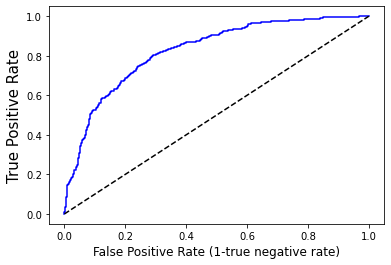

In [77]:
auc=metrics.roc_auc_score(y_test,y_pred_nn)
fpr,tpr,threshold=metrics.roc_curve(y_test,model_nn.predict(x_test).ravel())
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color="blue",label="logit model(area= %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate (1-true negative rate)",size=12)
plt.ylabel("True Positive Rate",size=15)

In [78]:
model_name=pd.Series(['logistic regression','Decision Tree','KNN','Naive Bayes','SVM','adaboost','random forest','bagging','LGBM','NeuralNetwork'])
acc=[accuracy['lr'],accuracy['dt'],accuracy['knn'],accuracy['nb'],accuracy['SVM'],accuracy['ada'],accuracy['rf'],accuracy['bagging'],accuracy['lgbm'],accuracy['nn']]
rec=[recall['lr'],recall['dt'],recall['knn'],recall['nb'],recall['SVM'],recall['ada'],recall['rf'],recall['bagging'],recall['lgbm'],recall['nn']]
pre=[precision['lr'],precision['dt'],precision['knn'],precision['nb'],precision['SVM'],precision['ada'],precision['rf'],precision['bagging'],precision['lgbm'],precision['nn']]
f1score=[f1['lr'],f1['dt'],f1['knn'],f1['nb'],f1['SVM'],f1['ada'],f1['rf'],f1['bagging'],f1['lgbm'],f1['nn']]
model_result=pd.DataFrame({'model name':model_name,'accuracy':acc,'recall':rec,'precision':pre,'f1-score':f1score})
model_result

,model name,accuracy,recall,precision,f1-score
0,logistic regression,0.760833,0.780528,0.754386,0.767234
1,Decision Tree,0.717500,0.793729,0.692086,0.739431
2,KNN,0.748333,0.793729,0.731003,0.761076
3,Naive Bayes,0.753333,0.744224,0.761824,0.752922
4,SVM,0.745000,0.810231,0.719941,0.762422
5,adaboost,0.743333,0.762376,0.738019,0.750000
6,random forest,0.740833,0.826733,0.708628,0.763138
7,bagging,0.751667,0.772277,0.745223,0.758509
8,LGBM,0.756667,0.806931,0.736446,0.770079
9,NeuralNetwork,0.755000,0.792079,0.740741,0.765550


In [79]:
models

{'model': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(max_depth=2),
 'dt': DecisionTreeClassifier(max_depth=2),
 'lr': LogisticRegression(),
 'knn': KNeighborsClassifier(n_neighbors=34, weights='distance'),
 'nb': GaussianNB(),
 'SVM': SVC(C=0.01, gamma=0.01, probability=True),
 'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                    n_estimators=400, random_state=7),
 'bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3),
                   max_samples=0.2, n_estimators=17, random_state=7),
 'rf': RandomForestClassifier(max_depth=2, max_features=4, n_estimators=107,
                        random_state=23),
 'lgbm': LGBMClassifier(learning_rate=0.09, max_depth=4, random_state=42),
 'nn': <keras.engine.sequential.Sequential at 0x1fc9c8dadc0>}

In [80]:
model_final=models['rf']

In [21]:
x_train

array([[ 1.76107985,  1.23289594,  1.94133801,  0.49639054],
       [ 0.33471897, -1.49699456, -1.15487148, -0.15711206],
       [-0.92051566,  0.26426941,  0.30706574, -0.53326439],
       ...,
       [ 0.80144583,  1.06683993,  1.19480046, -0.27850415],
       [ 0.93209732,  1.13675186,  1.19825302,  0.74005684],
       [-0.75452504,  1.41415581,  0.08416849, -0.18996825]])

In [21]:
y_rf_pred=model_rf.predict(x)

In [22]:
y_rf_pred

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
y_rf_pred_prob=model_rf.predict_proba(x)

In [26]:
y_rf_pred_prob[:,1]

array([0.6009406 , 0.637498  , 0.84908735, ..., 0.59574802, 0.74594069,
       0.57297503])

In [27]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [28]:
df['no-prognosis probability']=y_rf_pred_prob[:,0]
df['prognosis probability']=y_rf_pred_prob[:,1]

In [34]:
df.drop(['prognosis'],axis=1).head(10)

,age,systolic_bp,diastolic_bp,cholesterol,no-prognosis probability,prognosis probability
0,77.196340,85.288742,80.021878,79.957109,0.399059,0.600941
1,63.529850,99.379736,84.852361,110.382411,0.362502,0.637498
2,69.003986,111.349455,109.850616,100.828246,0.150913,0.849087
3,82.638210,95.056128,79.666851,87.066303,0.394104,0.605896
4,78.346286,109.154591,90.713220,92.511770,0.150913,0.849087
5,52.181782,121.080264,110.488129,115.468279,0.383550,0.616450
6,68.722144,115.232290,92.730813,106.784960,0.148230,0.851770
7,58.716578,98.653683,94.172130,100.829654,0.695827,0.304173
8,59.121758,102.681371,96.991612,106.331045,0.365115,0.634885
9,63.624683,96.341053,80.919213,121.558605,0.427391,0.572609


In [37]:
y_pred=model_rf.predict(x_test)

In [38]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

<AxesSubplot:>

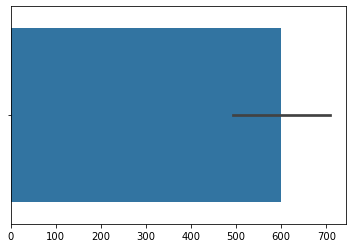

In [43]:
sns.barplot(pd.Series(y_pred).value_counts())

In [44]:
pd.Series(y_pred).value_counts()

1    707
0    493
dtype: int64

<BarContainer object of 2 artists>

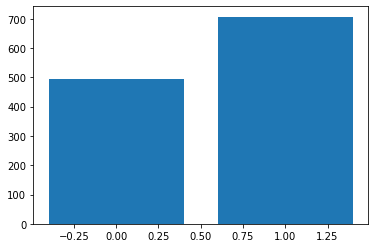

In [51]:
plt.bar(pd.Series(y_pred).unique(),pd.Series(y_pred).value_counts())